# GTEx Isoform Transcript Length Overview

## Part 1: Import Data and Configure Python Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec
%matplotlib inline
import seaborn as sns
import re
from IPython.display import display
from matplotlib.pyplot import gcf
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from PIL import ImageColor
from matplotlib.patches import Patch #for custom legend making
import scipy.spatial as sp, scipy.cluster.hierarchy as hc #for faster computing of hierarchial clusters

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [3]:
os.getcwd()

'C:\\Users\\15082\\OneDrive\\Desktop\\thesis_research\\gtex_v9_data_analysis\\FLAIR\\work_in_progress'

In [4]:
# change working directory
os.chdir('C:\\Users\\15082\\OneDrive\\Desktop\\thesis_research')

In [5]:
data_dir = 'gtex_v9_data\\data_for_analysis\\gtex_database_data'

In [6]:
transcript_length_file_path = os.path.join(data_dir, 'flair_filter_transcript_isoform_length.txt')

In [7]:
transcript_length_df = pd.read_csv(transcript_length_file_path, sep='\t')

## Part 2: Overview of Dataset

In [8]:
transcript_length_df.head(5)

,isoform,gene,length
0,dfe30c5c-ddd7-4ee8-a9ba-74556bd9dd87_chr10:628000,chr10:628000,2618
1,01252fde-2aa4-4b0d-99f6-c95a4efcc758_chr10:650000,chr10:649000,2709
2,5d705740-efaf-4cd9-9b68-71d6b775a3be_chr10:306...,chr10:3069000,1026
3,115765b8-4233-49bb-a2bf-93683ac4e094_chr10:313...,chr10:3132000,1608
4,6d54e9f3-0815-4ea6-a878-1ef2947c1cd0_chr10:482...,chr10:4826000,2530


In [9]:
transcript_length_df.shape

(93709, 3)

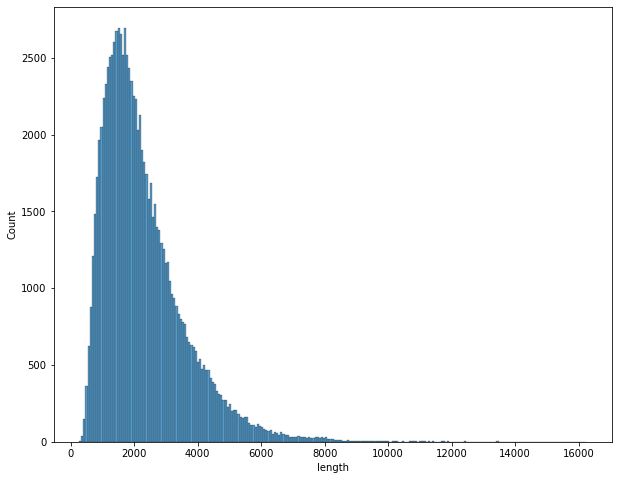

In [10]:
plt.figure(figsize=(10, 8))
sns.histplot(data=transcript_length_df, x="length")
plt.show()

In [11]:
transcript_length_df['isoform']

0        dfe30c5c-ddd7-4ee8-a9ba-74556bd9dd87_chr10:628000
1        01252fde-2aa4-4b0d-99f6-c95a4efcc758_chr10:650000
2        5d705740-efaf-4cd9-9b68-71d6b775a3be_chr10:306...
3        115765b8-4233-49bb-a2bf-93683ac4e094_chr10:313...
4        6d54e9f3-0815-4ea6-a878-1ef2947c1cd0_chr10:482...
                               ...                        
93704                 4a6b98d8-7f76-425f-a663-a7d3e4826c05
93705                                   ENST00000250784.12
93706                 bea576a7-6c87-43f3-8a92-1bbf2af9df4f
93707                 82867362-1175-4171-9e9d-620fb01ad65d
93708                 141285fb-d028-4740-a9d9-f04a28fbaef1
Name: isoform, Length: 93709, dtype: object

In [12]:
transcript_length_df.head()

,isoform,gene,length
0,dfe30c5c-ddd7-4ee8-a9ba-74556bd9dd87_chr10:628000,chr10:628000,2618
1,01252fde-2aa4-4b0d-99f6-c95a4efcc758_chr10:650000,chr10:649000,2709
2,5d705740-efaf-4cd9-9b68-71d6b775a3be_chr10:306...,chr10:3069000,1026
3,115765b8-4233-49bb-a2bf-93683ac4e094_chr10:313...,chr10:3132000,1608
4,6d54e9f3-0815-4ea6-a878-1ef2947c1cd0_chr10:482...,chr10:4826000,2530


In [16]:
transcript_length_df.gene

0              chr10:628000
1              chr10:649000
2             chr10:3069000
3             chr10:3132000
4             chr10:4826000
                ...        
93704    ENSG00000131002.11
93705    ENSG00000129824.15
93706    ENSG00000129824.15
93707    ENSG00000165246.13
93708    ENSG00000067048.16
Name: gene, Length: 93709, dtype: object

In [17]:
transcript_length_df['composite_id'] = transcript_length_df.apply(lambda x:'%s_%s' % (x['isoform'],x['gene']),axis=1)

In [18]:
transcript_length_df.head(3)

,isoform,gene,length,composite_id
0,dfe30c5c-ddd7-4ee8-a9ba-74556bd9dd87_chr10:628000,chr10:628000,2618,dfe30c5c-ddd7-4ee8-a9ba-74556bd9dd87_chr10:628...
1,01252fde-2aa4-4b0d-99f6-c95a4efcc758_chr10:650000,chr10:649000,2709,01252fde-2aa4-4b0d-99f6-c95a4efcc758_chr10:650...
2,5d705740-efaf-4cd9-9b68-71d6b775a3be_chr10:306...,chr10:3069000,1026,5d705740-efaf-4cd9-9b68-71d6b775a3be_chr10:306...


### Export the dataframe

In [19]:
#transcript_length_df.to_csv('gtex_v9_data\\data_for_analysis\\gtex_database_data\\transcript_length_df.csv', sep=',')